# Introduction
In this notebook, we will use a logistic regression model to classify irises into three different species.

First we import the packages we need:

* matplotlib.pyplot, which we use to make the plots
* numpy, which is used to handle vectors and matrices as numpy arrays
* datasets from sklearn (scikit-learn), which contains the iris dataset we are using
* LogisticRegression from sklearn.linearmodel, which we use to make and fit the linear regression model

In [1]:
import matplotlib.pylab as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn import datasets

Load the iris dataset and print a description

In [2]:
iris = datasets.load_iris()
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [3]:
iris.data.shape # feature matrix shape

(150, 4)

In [4]:
iris.target.shape # target vector shape

(150,)

In [5]:
iris.feature_names # column names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

It is difficult to visualize the data because it is 4-dimensional. However we can focus on 2 dimensions, for example the sepal length and petal length to make a plot.

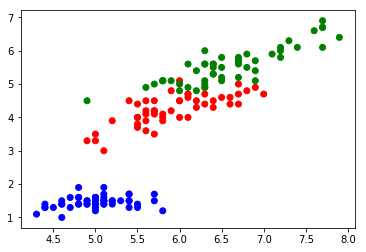

In [6]:
#Make a plot showing each iris as a data point 

#define corresponding colors for each label
color_map = {0 : 'blue', 1: 'red', 2: 'green'}

#Create plot, representing each data point by its values for sepal and petal length
plt.scatter(iris.data[:,0],iris.data[:,2],c=[color_map[y] for y in iris.target])
plt.show()

Since there is a clear linear boundary between class 0 (Iris-Setosa) and the other two classes, the plot suggests that a logistic classifier will be able to distinguish class 0 from the other classes without error. Although, classes 1 and 2 appear to overlap in the plot, we are unsure whether there is a linear boundary separating them if we consider all four features.

## Logistic Regression Model

![](http://)Multi-class Logistic Regression assumes the following model: [](http://)
 
 ### $P(y = i\, |\,x, \theta) = h^{(i)}_\theta(x) = g(\theta^T x)$ <br />
 where $g$ is the sigmoid function:
 ### $g(z) = \frac{1}{1+e^{-z}}$
 
 x individual iris data <br />
 $\theta$ coefficients <br />
 $\theta_0$ intercept <br />
 y target class<br />
 and i is a label for the class
 
 Using scikit-learn, logistic regression is simple:

In [7]:
# Separate train and test data, keeping the same distribution of targets in test and train sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, stratify = iris.target, random_state = 1, shuffle = True)

In [8]:
## Check that test set is made composed equally of sample from each target type  
count =[0,0,0]
for val in y_test:
    count[val] += 1
print(count)

[10, 10, 10]


In [9]:
# 1. Set up the model (model by default includes L2 regularization)
model = LogisticRegression(solver='lbfgs', multi_class='multinomial')
# 2. Use fit
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

After fitting the model, you can see the parameters, as follows (note there is a set of parameters for each class):

In [10]:
model.coef_ # Get the coefficients, theta

array([[-0.51418258,  0.77926699, -2.3829993 , -0.96096817],
       [ 0.30080676, -0.27663535, -0.15953089, -0.76810623],
       [ 0.21337582, -0.50263164,  2.54253019,  1.7290744 ]])

In [11]:
model.intercept_ # Get the intercept, theta_0

array([ 10.43734654,   2.92426549, -13.36161203])

Now let's look at how the model performs.

In [12]:
#Use score to get accuracy of predictions (the score here specifically gives the proportion of predictions that are correct)
print("Accuracy on training data = ", model.score(X_train, y_train))
print("Accuracy on test data = ", model.score(X_test, y_test))

Accuracy on training data =  0.9666666666666667
Accuracy on test data =  0.9666666666666667


## Digging Deeper

The accuracy of the model is very high but is not perfect. In this particular example, the model performs better just as well on the test data than on the train data but this is likely because the test set is quite small. 

One way to see where a classifier is making errors is with a **confusion matrix**. 

The code below defines a function that makes a plot of the confusion matrix (the code is copied from the sci-kit learn site: https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py)

In [13]:
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

def plot_confusion_matrix(y_true, y_pred, classes,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]


    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt =  'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    #return ax

Now let's make the confusion matrix. This time we will put all of the data into model (since the full dataset is relatively small).

[[50  0  0]
 [ 0 48  2]
 [ 0  3 47]]


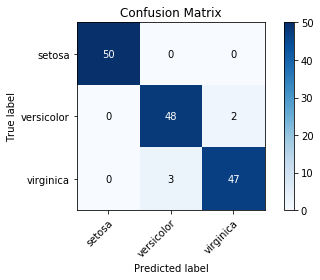

In [14]:
#Get predictions for the full data set using the model already created
predictions = model.predict(iris.data)

#Make confusion matrix and plot it
plot_confusion_matrix(iris.target,predictions, classes=iris.target_names,title='Confusion Matrix')

We can see that the model is misclassifying 2 of the Iris-versicolor (class 1) as Iris-virginica (class 2) and 3 of the Iris-virginica as Iris-versicolor.

# The wine dataset

As another demonstration of logistic regression, we can consider the wine dataset, also one of the datasets in scikit-learn. The dataset contains 13 features for a sample of wines: alcohol concentration, ash content, hue, etc. There are three different types of wine which compose the target classes.

In [15]:
wine = datasets.load_wine()
print(wine.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

In [16]:
wine.data.shape # feature matrix shape

(178, 13)

In [17]:
wine.target.shape # target vector shape

(178,)

In [18]:
X_wine_train, X_wine_test, y_wine_train, y_wine_test = train_test_split(wine.data, wine.target, test_size=0.2, stratify = wine.target, random_state = 1)

In [19]:
1# 1. Set up the model (model by default includes L2 regularization)
model_wine = LogisticRegression(solver='liblinear', multi_class='ovr')
# 2. Use fit
model_wine.fit(X_wine_train, y_wine_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [20]:
#Use score to get accuracy of predictions
print("Accuracy on training data = ", model_wine.score(X_wine_train, y_wine_train))
print("Accuracy on test data = ", model_wine.score(X_wine_test, y_wine_test))

Accuracy on training data =  0.971830985915493
Accuracy on test data =  0.9444444444444444


We can see that the logistic classifier does a fairly good job of distinguishing between the three classes of wine.

### Using Polynomial features

One could also consider using polynomial features to allow the logistic model to determine non-linear decision boundaries. Below we use PolynomialFeatures in scikit-learn's preprocessing library to form the polynomial features. In this case, we only consider features up to degree 2 in the original features.

In [32]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree = 2)
X_full = poly.fit_transform(wine.data)

Note that the number of columns in the dataset has now increased from 13 to 105. This means that after adding in the degree 2 features, we now have 105 features total.

In [33]:
wine.data.shape

(178, 13)

In [34]:
X_full.shape

(178, 105)

In [35]:
X_wine_train, X_wine_test, y_wine_train, y_wine_test = train_test_split(X_full, wine.target, test_size=0.2, stratify = wine.target, random_state = 1)
1# 1. Set up the model (model by default includes L2 regularization)
model_wine = LogisticRegression(solver='liblinear', multi_class='ovr')
# 2. Use fit
model_wine.fit(X_wine_train, y_wine_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [36]:
#Use score to get accuracy of predictions
print("Accuracy on training data = ", model_wine.score(X_wine_train, y_wine_train))
print("Accuracy on test data = ", model_wine.score(X_wine_test, y_wine_test))

Accuracy on training data =  1.0
Accuracy on test data =  0.9444444444444444


Here we see that adding in polynomial features has increased the training accuracy to perfect but has not improved the test accuracy. This suggests that adding in polynomial features allowed the classifier to overfit the training data without any increased predictive accuracy.

If one wanted to still try to get a more predictive model that includes non-linear decision boundaries they could consider applying feature scaling before adding in polynomial features or perhaps using a neural network instead of a logistic classifier.